In [2]:
import numpy as np
import re
from scipy import spatial

In [3]:
with open("mine/clean.txt") as file:
    contents = file.read()

contents = re.sub(r'[^\w\s]',' ', contents)
contents = re.sub(' +', ' ', contents)

In [40]:
characters = set(contents)

In [165]:
N = 100000
table = {}
np.random.seed(76)
for c in characters:
    table[c] = np.random.choice([-1, 1], size=(N,))

In [166]:
context = {}
for c in characters:
    context[c] = np.zeros(N)

In [167]:
del(context[' '])

In [145]:
contents = " " + contents + " "

In [168]:
for i in range(len(contents)):
    c = contents[i]
    if c in context: 
        context[c] = np.add(context[c], #np.multiply(np.multiply(np.roll(table[contents[i - 2]], -2), np.roll(table[contents[i + 2]], 2)), 
                                np.multiply(np.roll(table[contents[i - 1]], -1), np.roll(table[contents[i + 1]], 1)))

In [174]:
for c in context:
    context[c] = context[c] / np.linalg.norm(context[c])

In [1]:
#import tsne_python as TSNE
from sklearn.manifold import TSNE

In [11]:
import pandas as pd

In [169]:
dataset = pd.DataFrame.from_dict(context, orient = 'index')

In [172]:
tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=1000)
tsne_results = tsne.fit_transform(dataset)

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 26 samples in 0.016s...
[t-SNE] Computed neighbors for 26 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 26 / 26
[t-SNE] Mean sigma: 57762.435406
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.619698
[t-SNE] KL divergence after 1000 iterations: 0.469770


In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [72]:
import seaborn as sns

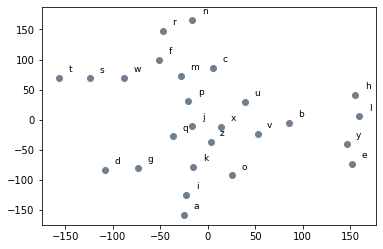

In [173]:
a = tsne_results[:, 0]
b = tsne_results[:, 1]

for i, type in enumerate(dataset.index.values):
    x = a[i]
    y = b[i]
    plt.scatter(x, y, color = "slategrey")
    plt.text(x+10, y+10, type, fontsize=9)
plt.show()

In [175]:
dataset = pd.DataFrame.from_dict(context, orient = 'index')

In [182]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000)
tsne_results = tsne.fit_transform(dataset)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 26 samples in 0.000s...
[t-SNE] Computed neighbors for 26 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 26 / 26
[t-SNE] Mean sigma: 0.373856
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.645760
[t-SNE] KL divergence after 1000 iterations: 0.366656


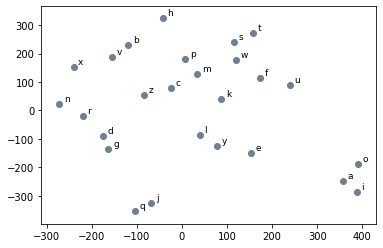

In [183]:
a = tsne_results[:, 0]
b = tsne_results[:, 1]

for i, type in enumerate(dataset.index.values):
    x = a[i]
    y = b[i]
    plt.scatter(x, y, color = "slategrey")
    plt.text(x+10, y+10, type, fontsize=9)
plt.show()